In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
from tqdm import tqdm
from pathlib import Path
from uco.data_loader import pivot_df

In [3]:
N = 3698
C = 4
H = 350
W = 525

In [6]:
df = pd.read_csv('../saved/original/clas/training/index.csv')
df.sort_values('score', ascending=True, inplace=True)
print(df.shape)
df.head(60)

(49, 19)


,score,run,seed,encoder,decoder,dropout,encoder_weights,augs,img_height,img_width,batch_size,bce_weight,dice_weight,lovasz_weight,optimizer,anneal_start,anneal_end,encoder_lr,decoder_lr
22,0.462365,1113-161052,25436013,efficientnet-b0,EfficientNet,0,NaN,CutoutDistortionTransforms,448,672,16,1,0,0,RAdam,1,16,0.000091,0
33,0.463282,1115-004210,4214600,efficientnet-b0,EfficientNet,0,NaN,DistortionTransforms,448,672,16,1,0,0,RAdam,1,16,0.000071,0
44,0.465368,1115-211537,4528728,efficientnet-b0,EfficientNet,0,NaN,HeavyResizeTransforms,448,672,16,1,0,0,RAdam,1,16,0.000086,0
19,0.465679,1112-165714,32849757,efficientnet-b4,EfficientNet,0,NaN,CutoutDistortionTransforms,320,480,12,1,0,0,RAdam,1,26,0.000050,0
14,0.468122,1112-101538,7951015,efficientnet-b4,EfficientNet,0,NaN,CutoutDistortionTransforms,320,480,12,1,0,0,RAdam,1,26,0.000050,0
42,0.468560,1115-085447,29482886,efficientnet-b2,EfficientNet,0,NaN,CutoutTransforms,384,576,16,1,0,0,RAdam,1,16,0.000071,0
40,0.470589,1115-062409,21571605,efficientnet-b2,EfficientNet,0,NaN,DistortionTransforms,384,576,16,1,0,0,RAdam,1,16,0.000063,0
1,0.471587,1111-233515,3550,efficientnet-b2,EfficientNet,0,NaN,CutoutDistortionTransforms,384,576,16,1,0,0,RAdam,5,31,0.000050,0
23,0.471613,1113-165159,27626959,efficientnet-b0,EfficientNet,0,NaN,CutoutTransforms,448,672,16,1,0,0,RAdam,1,16,0.000057,0
38,0.472212,1115-050826,17321410,efficientnet-b2,EfficientNet,0,NaN,CutoutTransforms,384,576,16,1,0,0,RAdam,1,16,0.000054,0


(0.46, 0.5)

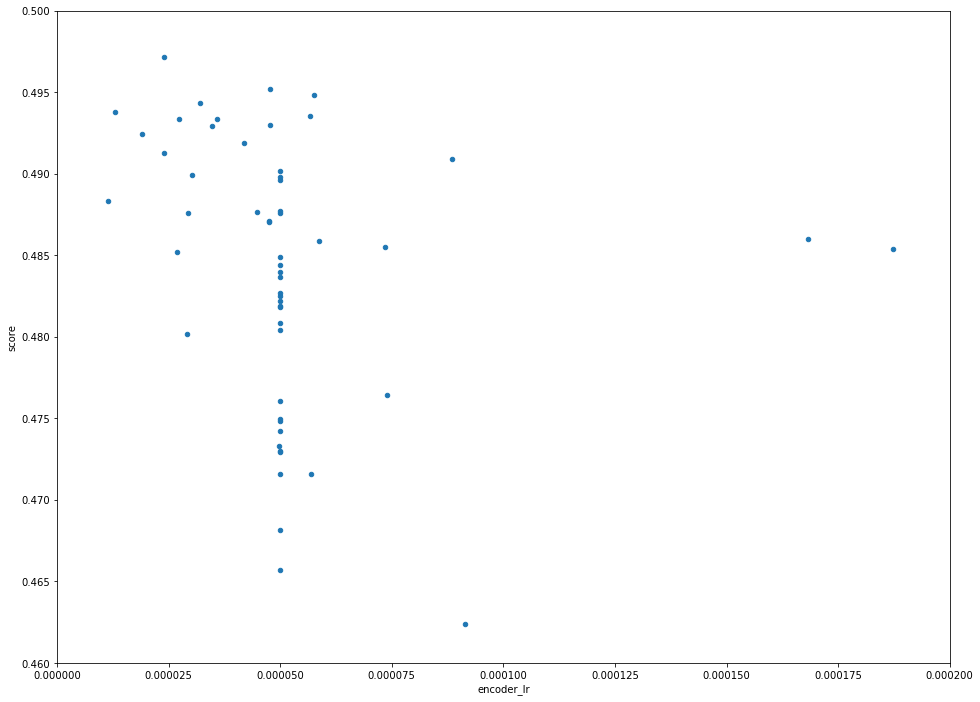

In [11]:
fig, ax = plt.subplots(figsize=(16, 12))
ax = df.plot(kind='scatter', x='encoder_lr', y='score', ax=ax)
ax.set_xlim(0, 0.0002)
ax.set_ylim(0.46, 0.50)

In [26]:
with h5py.File('../data/predictions/raw-clas-predictions.h5', 'r') as f:
    for g in f.keys():
        print(g)
        [print(k) for k in f[g].keys()]

efficientnet-b0-EfficientNet
1111-223611
1112-224704
1113-000511
1113-030708
1113-045233
1113-053105
1113-090031
1113-140033
1113-161052
1113-165159
efficientnet-b2-EfficientNet
1111-233515
1112-002102
1112-005613
1112-013307
1112-021907
1112-030215
1112-034257
1112-041852
1112-050150
1112-053341
1112-062438
1112-071648
1113-021106
1113-042648
1113-062340
1113-103914
1113-115811
efficientnet-b4-EfficientNet
1112-081106
1112-085107
1112-092822
1112-101538
1112-110003
1112-115308
1112-133028
1112-141340
1112-153930
1112-161726
1112-165714
1113-011407


In [28]:
with h5py.File('../data/predictions/avg-clas-predictions.h5', 'r') as f:
    for g in f.keys():
        print(g)

average
